# Capstone Project - The Battle of Neighborhoods

## Introduction

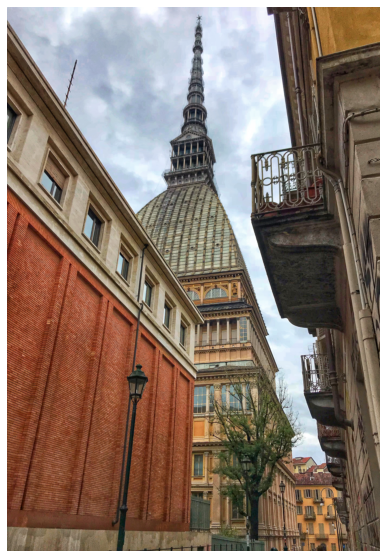

A view of Mole Antonelliana.


In [1]:
#show the output

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *

img0 = np.array(Image.open('Mole_.jpeg'))
fig = plt.figure()
plt.imshow(img0, interpolation='bilinear')
fig.set_figwidth(8)
fig.set_figheight(10)
plt.axis('off')
plt.show()

print('A view of Mole Antonelliana.')

### The objective of this assignment:

Increase the international turism of this marvelous city and make a curious alternative to explore it.

For this purpose, I created an interactive guide and I used Foursquare location data to extrapolate useful information about museums, restaurants and hotels.

It is divided into 5 parts:

1. **Statistics and Ranking**: Show the ranking of Turin compared to the main Italian cities.


2. **About the city**: A short description of the city.


3. **Climate data**: A table of the climate data of the city.


4. **Segmenting and Clustering Neighborhoods in Torino**: Analysis of the neighborhoods and clustering.


5. **Segmenting and Clustering of the Main Venues in Torino**: If you are interested to visit this city, I add this analysis with the main venues recommended by me.

Here, I also left some useful links for you:

1. https://www.turismotorino.org/en

2. https://www.lonelyplanet.com/italy/liguria-piedmont-and-valle-daosta/turin

### Target audience:

Addressed to all those who have decided to plan a trip to Italy.

### Questions:

Before I start, I ask you these questions:

1) **How much you know about Turin?**

2) **Have you chosen Turin as travel destination for your next holidays?**



Now, let's start!

# 1. Statistics and Ranking

the first step is to obtain the ranking of the main Italian cities preferred by tourists and plot the results.

Looking at the statistics, Italy is the fifth most visited country in international turism in 2018. In 2017, the overall had 420.63 million visitor nights, of which 210.66 million were of foreign guests (50.08%) (source: https://en.wikipedia.org/wiki/Tourism_in_Italy). But only 1.8 million foreign visitors (out of a total of 7.0 million visitors) visited Turin. in fact, as shown in the table, it is in 13th place! And this is another little goals: try to promote Turin to a better ranking.

In [2]:
#import all library
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
#!pip install bs4
import requests #library for requests
from bs4 import BeautifulSoup
#image libraries
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *
import requests
from matplotlib.ticker import StrMethodFormatter

Italy_text = requests.get('https://en.wikipedia.org/wiki/Tourism_in_Italy').text
soup = BeautifulSoup(Italy_text)
table = soup.find('table',{'class':'wikitable sortable'})

#Extracting the data and cleaning data
table_rows = table.find_all('tr')

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')]) #clean data
    
del data[0] #delete first element of the table

column_names=['Rank','City','#_of_nights_in_2017', '#_of_whom_foreign_visitors','Region']
df = pd.DataFrame(data, columns=column_names) #create Dataframe

In [3]:
#Preprocessing

#eliminate comma from the numbers with the function .replace()
df["#_of_nights_in_2017"] = df["#_of_nights_in_2017"].str.replace(',', '')
df["#_of_whom_foreign_visitors"] = df["#_of_whom_foreign_visitors"].str.replace(',', '')

#convert the number in millions with the function .apply()
df["#_of_nights_in_2017"] = df["#_of_nights_in_2017"].apply(lambda x: round(int(x)/1000000,2))
df["#_of_whom_foreign_visitors"] = df["#_of_whom_foreign_visitors"].apply(lambda x: round(int(x)/1000000,2))

#Rename the columns
df.rename(columns={"#_of_nights_in_2017": "tot_nights [mln]", "#_of_whom_foreign_visitors":"tot_nights_foreign [mln]"},inplace=True)

#Eliminate row 'Total' from the database
df=df[df['City']!='Total']

In [4]:
#Sort values by 'tot_nights'
sort=df.sort_values(by=['tot_nights [mln]'], ascending=True).reset_index()

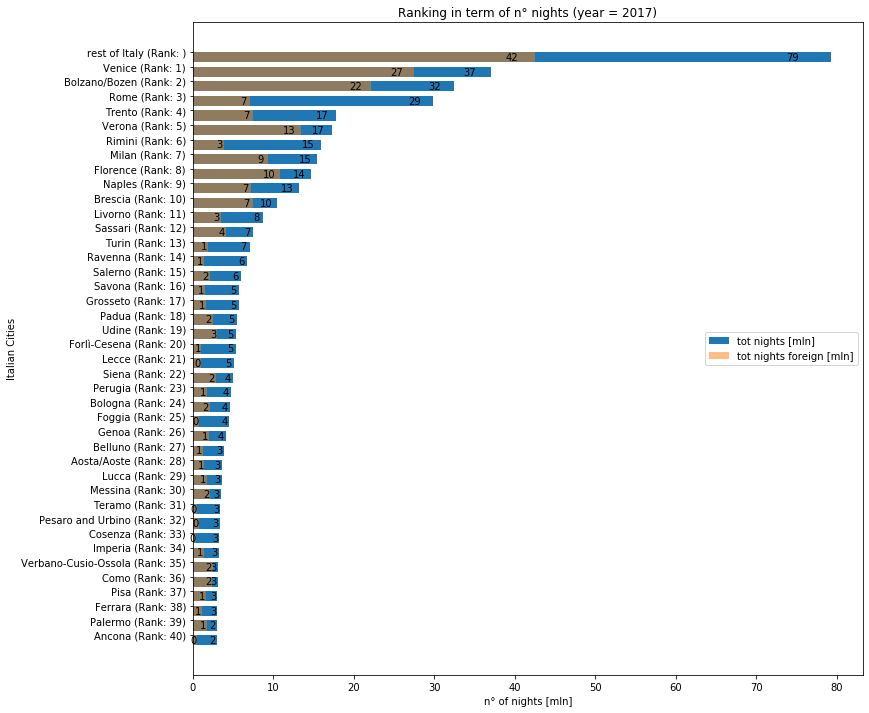

In [5]:
#Plot graphic

import matplotlib.pyplot as plt
import pandas as pd

a_vals = sort["tot_nights [mln]"]
b_vals = sort["tot_nights_foreign [mln]"]
ind = np.arange(df.shape[0])
width = 0.35

# Set the colors
#colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g']


def autolabel(bars):
    # attach some text labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width*0.95, bar.get_y() + bar.get_height()/2,
                '%d' % int(width),
                ha='right', va='center')


# make the plots
fig, ax = plt.subplots(figsize=(12,12))
a = ax.barh(ind, a_vals, width*2) # plot a vals
b = ax.barh(ind, b_vals, width*2, alpha=0.5)  # plot b vals
ax.set_yticks(ind + width)  # position axis ticks
ax.set_yticklabels(sort["City"]+' (Rank: '+ sort["Rank"]+')')  # set them to the names
ax.legend(("tot nights [mln]", "tot nights foreign [mln]"), loc='center right')

plt.xlabel('n° of nights [mln]')
plt.ylabel('Italian Cities')
plt.title("Ranking in term of n° nights (year = 2017)")
autolabel(a)
autolabel(b)

plt.show()

In [6]:
df.head(15)

,Rank,City,tot_nights [mln],tot_nights_foreign [mln],Region
0,1,Venice,37.04,27.48,Veneto
1,2,Bolzano/Bozen,32.40,22.13,Trentino-Alto Adige/Südtirol
2,3,Rome,29.83,7.05,Lazio
3,4,Trento,17.78,7.41,Trentino-Alto Adige/Südtirol
4,5,Verona,17.29,13.39,Veneto
5,6,Rimini,15.97,3.81,Emilia-Romagna
6,7,Milan,15.47,9.29,Lombardy
7,8,Florence,14.72,10.78,Tuscany
8,9,Naples,13.16,7.25,Campania
9,10,Brescia,10.46,7.47,Lombardy


# 2. About the city

`Turin` (/tjʊəˈrɪn, ˈtjʊərɪn/ tewr-IN, TEWR-in, Piedmontese: `[tyˈriŋ]` (About this soundlisten); Italian: Torino `[toˈriːno]`(About this soundlisten); Latin: Augusta Taurinorum, then Taurinum) is a city and an important business and cultural centre in northern Italy. It is the capital city of Piedmont and of the Metropolitan City of Turin, and was the first Italian capital from 1861 to 1865. The city is located mainly on the western bank of the Po River, in front of Susa Valley, and is surrounded by the western Alpine arch and Superga Hill. The population of the city proper is 875,698 (31 December 2018) while the population of the urban area is estimated by Eurostat to be 1.7 million inhabitants. The Turin metropolitan area is estimated by the OECD to have a population of 2.2 million.

Turin is sometimes called "the cradle of Italian liberty" for having been the birthplace and home of notable individuals who contributed to the Risorgimento, such as Cavour. Even though much of its political significance and importance had been lost by World War II, Turin became a major European crossroad for industry, commerce and trade, and is part of the famous "industrial triangle" along with Milan and Genoa. Turin is ranked third in Italy, after Milan and Rome, for economic strength. With a GDP of $58 billion, Turin is the world's 78th richest city by purchasing power. As of 2018, the city has been ranked by GaWC as a Gamma World city. Turin is also home to much of the Italian automotive industry, with the headquarters of Fiat, Lancia and Alfa Romeo.

The city has a rich culture and history, being known for its numerous art galleries, restaurants, churches, palaces, opera houses, piazzas, parks, gardens, theatres, libraries, museums and other venues. Turin is well known for its Renaissance, Baroque, Rococo, Neo-classical, and Art Nouveau architecture.

In addition, the city is home to museums such as Museo Egizio, Mole Antonelliana and Museo Nazionale del Cinema. The city also hosts some of Italy's best universities, colleges, academies, lycea and gymnasia, such as the University of Turin, founded in the 15th century, and the Turin Polytechnic. Turin is well known as the home of the Shroud of Turin, the football teams Juventus F.C. and Torino F.C., and as host of the 2006 Winter Olympics (source: https://en.wikipedia.org/wiki/Turin)

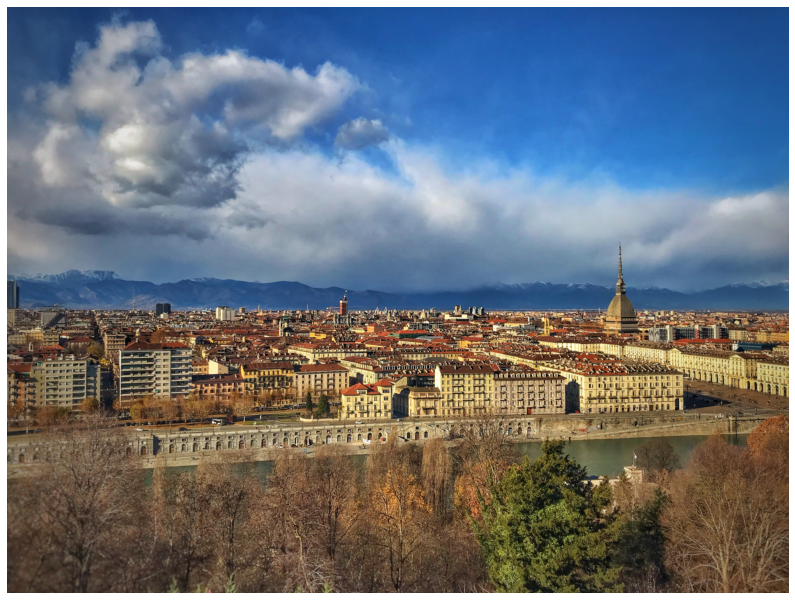

A beautiful view of Turin from the Monte dei Cappuccini.


In [7]:
#show the output

import matplotlib.pyplot as plt
from PIL import Image
from pylab import *

img1 = np.array(Image.open('Monte-Cappuccini.jpeg'))
fig = plt.figure()
plt.imshow(img1, interpolation='bilinear')
fig.set_figwidth(14)
fig.set_figheight(18)
plt.axis('off')
plt.show()

print('A beautiful view of Turin from the Monte dei Cappuccini.')

# 3. Climate data

Turin features a humid subtropical climate (Köppen: Cfa) in contrast to the Mediterranean climate characteristic of the coast of Italy.

Winters are moderately cold but dry, summers are mild in the hills and quite hot in the plains. Rain falls mostly during spring and autumn; during the hottest months, otherwise, rains are less frequent but heavier (thunderstorms are frequent). During the winter and autumn months banks of fog, which are sometimes very thick, form in the plains but rarely on the city because of its location at the end of the Susa Valley.

Its position on the east side of the Alps makes the weather drier than on the west side because of the föhn wind effect.

The highest temperature ever recorded was 37.1 °C (98.8 °F), while the lowest was −21.8 °C (−7.2 °F).

(source:https://en.wikipedia.org/wiki/Turin)

I extrapolated the climate data in order to give you the opportunity to choose the best season to visit the city.

In [8]:
Torino_text = requests.get('https://en.wikipedia.org/wiki/Turin').text
soup1 = BeautifulSoup(Torino_text)
table1 = soup1.find('table',{'class':'wikitable collapsible'})
table_rows = table1.find_all('tr')

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')]) #clean data

del data[0] #delete first element of the table
del data[10]

column_names = ['Month','Record high °C (°F)','Average high °C (°F)','Daily mean °C (°F)', 'Average low °C (°F)','Record low °C (°F)','Average precipitation mm (inches)','Average precipitation days (≥ 1.0 mm)','Average relative humidity (%)','Mean monthly sunshine hours']
index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Year']

df = pd.DataFrame(data, index=column_names, columns=index) #create Dataframe

df.drop(['Month'],axis=0)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
Record high °C (°F),25.1(77.2),26.6(79.9),27.4(81.3),31.0(87.8),32.3(90.1),35.6(96.1),36.8(98.2),37.1(98.8),32.2(90.0),30.0(86.0),22.8(73.0),21.4(70.5),37.1(98.8)
Average high °C (°F),6.6(43.9),9.1(48.4),13.4(56.1),16.6(61.9),20.7(69.3),24.8(76.6),27.9(82.2),27.1(80.8),23.0(73.4),17.3(63.1),11.1(52.0),7.6(45.7),17.1(62.8)
Daily mean °C (°F),2.0(35.6),4.3(39.7),8.1(46.6),11.1(52.0),15.5(59.9),19.4(66.9),22.4(72.3),21.8(71.2),17.8(64.0),12.4(54.3),6.5(43.7),3.1(37.6),12.0(53.6)
Average low °C (°F),−2.5(27.5),−0.7(30.7),2.7(36.9),5.7(42.3),10.4(50.7),14.0(57.2),16.9(62.4),16.5(61.7),12.7(54.9),7.4(45.3),1.9(35.4),−1.6(29.1),7.0(44.6)
Record low °C (°F),−18.5(−1.3),−21.8(−7.2),−10.5(13.1),−3.8(25.2),−2.3(27.9),4.3(39.7),6.6(43.9),6.3(43.3),1.8(35.2),−3.9(25.0),−8.2(17.2),−13.8(7.2),−21.8(−7.2)
Average precipitation mm (inches),47.8(1.88),47.1(1.85),72.5(2.85),113.3(4.46),145.3(5.72),104.3(4.11),70.5(2.78),76.1(3.00),83.8(3.30),106.1(4.18),69.1(2.72),45.1(1.78),981.0(38.62)
Average precipitation days (≥ 1.0 mm),5.4,4.4,5.8,8.6,11.2,8.6,5.8,7.7,6.4,7.0,5.6,4.4,80.9
Average relative humidity (%),75,75,67,72,75,74,72,73,75,79,80,80,75
Mean monthly sunshine hours,111.6,118.7,158.1,180.0,195.3,219.0,260.4,223.2,168.0,142.6,105.0,108.5,"1,990.4"


I recommend visiting it during spring (March / April) and autumn (October / November) to admire the colors of the city, especially from the Monte dei Cappuccini. While, if you want to breathe a magical atmosphere, I recommend also December because the city lights up with the colors of Christmas.

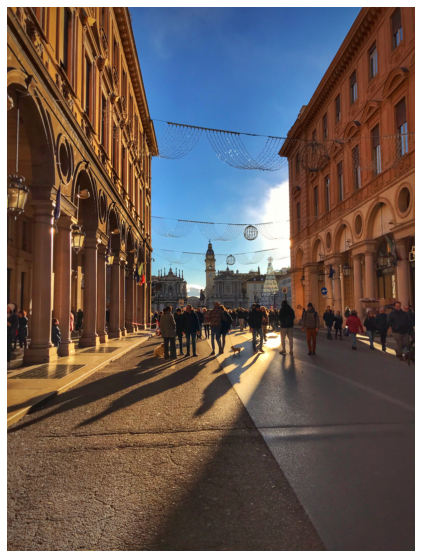

Via Roma during Christmas time!


In [9]:
img2 = np.array(Image.open('Lights.jpeg'))
fig = plt.figure()
plt.imshow(img2, interpolation='bilinear')
fig.set_figwidth(8)
fig.set_figheight(10)
plt.axis('off')
plt.show()

print('Via Roma during Christmas time!')

# 4. Segmenting and Clustering Neighborhoods in Torino

In this part of the guide, I am going to analyze the main neighborhoods of Turin. 

The steps that I made are:

1. **Import data of Neighborhoods**: After importing all the necessary libraries, I extract the information about the neighborhoods of Turin from the `neighborhood.csv` file, in particular: name, latitude and longitude.


2. **Explore Neighborhoods**:  With these data, I will make request to Foursquare API to get the venues' informations about each area.


3. **Analyze Each Neighborhood**: Then I analyze the most common places for each area.


4. **Clustering of Neighborhoods**: and I will do the clustering. 


5. **Show the Clustering results**: Finally, I plot the city map with clusters.

In [10]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


#!pip install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!pip install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


### 1. Import data of Neighborhoods

In [11]:
#Import CSV file
ToVenues= pd.read_csv('neighborhood.csv', delimiter=";") #quoting=csv.QUOTE_NONE, encoding='utf-8')
ToVenues.head()

,name,lat,lng
0,Centro,45.066440,7.682102
1,Crocetta,45.057985,7.663966
2,Santa Rita,45.048882,7.645902
3,Mirafiori Nord,45.043408,7.626915
4,Mirafiori Sud,45.012877,7.654279


In [ ]:
CLIENT_ID = 'YOUR CLIENT_ID' # your Foursquare ID
CLIENT_SECRET = 'YOUR CLIENT_SECRET' # your Foursquare Secret
VERSION = '20180604'
RADIUS = 100000


print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

### 2. Explore Neighborhoods

In [13]:
#Function 
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
#Write the code to run the above function on each neighborhood and create a new dataframe called *torino_venues*
torino_venues = getNearbyVenues(names=ToVenues['name'],
                                   latitudes=ToVenues['lat'],
                                   longitudes=ToVenues['lng']
                                  )

Centro
Crocetta
Santa Rita
Mirafiori Nord
Mirafiori Sud
Borgo San Paolo
Cenisia
Pozzo Strada
Cit Turin
Borgata Lesna
San Donato
Borgo Campidoglio
Parella
Borgo Vittoria
Madonna di Campagna
Lucento
Le Vallette
Barriera di Milano
Barca
Bertolla
Falchera
Rebaudengo
Villaretto
Aurora
Vanchiglia
Sassi
Madonna del Pilone
San Salvario
Cavoretto
Borgo Po
Nizza Millefonti
Lingotto


In [15]:
torino_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Centro,45.06644,7.682102,Piazza San Carlo,45.067804,7.682546,Plaza
1,Centro,45.06644,7.682102,Signorvino,45.066237,7.683065,Wine Bar
2,Centro,45.06644,7.682102,Louis Vuitton,45.065548,7.681006,Boutique
3,Centro,45.06644,7.682102,Perino Vesco,45.065271,7.683050,Bakery
4,Centro,45.06644,7.682102,Caffé Stratta,45.067552,7.682555,Café


In [16]:
#Create a new database for clustering analysis
ToVenues_ = ToVenues
#Rename the column Name
ToVenues_.columns=['Neighborhood','Latitude','Longitude']

In [17]:
#Check how many venues were returned for each neighborhood
torino_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aurora,18,18,18,18,18,18
Barca,2,2,2,2,2,2
Barriera di Milano,5,5,5,5,5,5
Bertolla,5,5,5,5,5,5
Borgata Lesna,5,5,5,5,5,5


### 3. Analyze Each Neighborhood

In [18]:
# one hot encoding
torino_onehot = pd.get_dummies(torino_venues[['Venue Category']], prefix="", prefix_sep="")
torino_onehot.drop(['Neighborhood'],axis=1,inplace=True) 
torino_onehot.insert(loc=0, column='Neighborhood', value=torino_venues['Neighborhood'] )
torino_onehot.shape

(667, 146)

In [19]:
#Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
torino_grouped = torino_onehot.groupby('Neighborhood').mean().reset_index()
torino_grouped.head()

,Neighborhood,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Bagel Shop,Bakery,Bar,Beer Bar,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Cable Car,Café,Campanian Restaurant,Campground,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Electronics Store,Emilia Restaurant,Ethiopian Restaurant,Event Space,Fast Food Restaurant,Fish Market,Flea Market,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Kebab Restaurant,Kids Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Office,Park,Pastry Shop,Pedestrian Plaza,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Piadineria,Piedmontese Restaurant,Pizza Place,Platform,Plaza,Pool,Pub,Racetrack,Record Shop,Rental Car Location,Rest Area,Restaurant,Rock Club,Roman Restaurant,Russian Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Sicilian Restaurant,Skate Park,Smoke Shop,Soccer Field,Soccer Stadium,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Train Station,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Winery
0,Aurora,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.055556,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.055556,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0
1,Barca,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Barriera di Milano,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.200000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [20]:
#Write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
#Create new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = torino_grouped['Neighborhood']

for ind in np.arange(torino_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(torino_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aurora,Chinese Restaurant,Supermarket,Pizza Place,Bagel Shop,Music Venue,Scenic Lookout,Office,Diner,Pet Store,Kebab Restaurant
1,Barca,Italian Restaurant,Japanese Restaurant,Ethiopian Restaurant,Food Truck,Food Stand,Flea Market,Fish Market,Fast Food Restaurant,Event Space,Emilia Restaurant
2,Barriera di Milano,Discount Store,Café,Hostel,Pizza Place,Market,Emilia Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Event Space
3,Bertolla,Construction & Landscaping,Rental Car Location,Pizza Place,Gym / Fitness Center,Salon / Barbershop,Winery,Electronics Store,Fish Market,Fast Food Restaurant,Event Space
4,Borgata Lesna,Ice Cream Shop,Trattoria/Osteria,Restaurant,Gym,Bus Stop,Department Store,Deli / Bodega,Cupcake Shop,Dessert Shop,Diner
5,Borgo Campidoglio,Hotel,Pizza Place,Brewery,Ice Cream Shop,Irish Pub,Japanese Restaurant,Jewelry Store,Gift Shop,Mediterranean Restaurant,Diner
6,Borgo Po,Café,Italian Restaurant,Sushi Restaurant,Park,Cupcake Shop,Pizza Place,Bike Rental / Bike Share,Plaza,Piadineria,Seafood Restaurant
7,Borgo San Paolo,Café,Plaza,Chinese Restaurant,Japanese Restaurant,Pizza Place,Piedmontese Restaurant,French Restaurant,Gym,Smoke Shop,Peruvian Restaurant
8,Borgo Vittoria,Chinese Restaurant,Café,Pizza Place,Winery,Plaza,Convenience Store,Community Center,Pub,Kids Store,Gym / Fitness Center
9,Cavoretto,Italian Restaurant,Bus Station,Café,Park,Food Truck,Food Stand,Flea Market,Fish Market,Fast Food Restaurant,Event Space


### 4. Clustering of Neighborhoods

In [22]:
#Run k-means to cluster the neighborhood into 31 clusters

# set number of clusters
kclusters = 31

torino_grouped_clustering = torino_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(torino_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([19,  8, 12,  9,  6, 24, 20, 17, 10,  4], dtype=int32)

In [23]:
neighborhoods_venues_sorted.shape

(32, 11)

In [24]:
#Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

torino_merge = ToVenues_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
torino_merged = pd.merge(torino_merge, neighborhoods_venues_sorted, on='Neighborhood')

torino_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Centro,45.066440,7.682102,28,Café,Plaza,Pizza Place,Ice Cream Shop,Sushi Restaurant,Piedmontese Restaurant,Italian Restaurant,Historic Site,Hotel,Chocolate Shop
1,Crocetta,45.057985,7.663966,26,Café,Ice Cream Shop,Pizza Place,Health Food Store,Pastry Shop,Monument / Landmark,Restaurant,Coffee Shop,Fried Chicken Joint,Market
2,Santa Rita,45.048882,7.645902,23,Café,Pizza Place,Ice Cream Shop,Supermarket,Fried Chicken Joint,Market,Piedmontese Restaurant,Electronics Store,Clothing Store,Fast Food Restaurant
3,Mirafiori Nord,45.043408,7.626915,7,Hotel,Pub,Pizza Place,Event Space,Gym,Department Store,Deli / Bodega,Dessert Shop,Diner,Food Truck
4,Mirafiori Sud,45.012877,7.654279,11,Italian Restaurant,Toy / Game Store,Music Venue,Supermarket,Pool,Historic Site,Food Stand,Cultural Center,Cupcake Shop,Deli / Bodega


In [25]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,19,Aurora,Chinese Restaurant,Supermarket,Pizza Place,Bagel Shop,Music Venue,Scenic Lookout,Office,Diner,Pet Store,Kebab Restaurant
1,8,Barca,Italian Restaurant,Japanese Restaurant,Ethiopian Restaurant,Food Truck,Food Stand,Flea Market,Fish Market,Fast Food Restaurant,Event Space,Emilia Restaurant
2,12,Barriera di Milano,Discount Store,Café,Hostel,Pizza Place,Market,Emilia Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Event Space
3,9,Bertolla,Construction & Landscaping,Rental Car Location,Pizza Place,Gym / Fitness Center,Salon / Barbershop,Winery,Electronics Store,Fish Market,Fast Food Restaurant,Event Space
4,6,Borgata Lesna,Ice Cream Shop,Trattoria/Osteria,Restaurant,Gym,Bus Stop,Department Store,Deli / Bodega,Cupcake Shop,Dessert Shop,Diner


### 5. Show the Clustering results:

In [26]:
#Visualize the resulting clusters

latitude = 45.070313
longitude = 7.6868563

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
# BUG FIXME 
markers_colors = []
for lat, lon, poi, cluster in zip(torino_merged['Latitude'], torino_merged['Longitude'], torino_merged['Neighborhood'], torino_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 5. Segmenting and Clustering of the Main Venues in Torino

I add this analysis with the main venues recommended by me. The steps are same to the point 4.

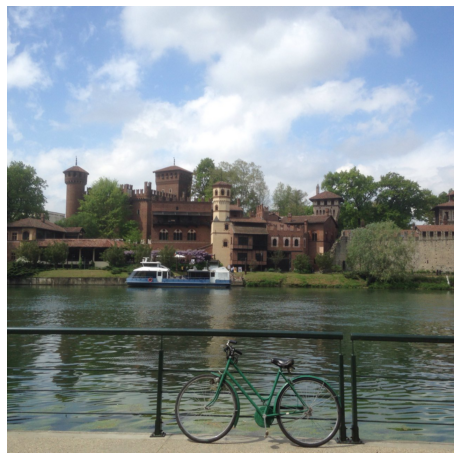

A view of Borgo Medioevale.


In [42]:
img3 = np.array(Image.open('Borgo.jpeg'))
fig = plt.figure()
plt.imshow(img3, interpolation='bilinear')
fig.set_figwidth(8)
fig.set_figheight(10)
plt.axis('off')
plt.show()

print('A view of Borgo Medioevale.')

In [27]:
main_venues = pd.read_csv('Venues_Turin.csv', delimiter=";")

main_venues.head()

,postalCode,name,lat,lng
0,10122,Torino Piazza Castello,45.071705,7.685444
1,10134,Cammafà Pizzeria,45.033257,7.656139
2,10124,Mu Fusion Dumplings,45.065860,7.693980
3,10122,Al Bicerin,45.076432,7.678993
4,10132,Fujiyama,45.067893,7.712756


In [ ]:
#Function 

client_id ='YOUR CLIENT_ID'
client_secret ='YOUR CLIENT_SECRET'
v ='20180604'

def getNearbyVenues(names, latitudes, longitudes):
    venues_list = []
    total = len(names)-1
    current = 0
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query="{}"&radius=50'.format(client_id,client_secret,lat,lng,v,name)
        response = requests.request("GET", url).json()['response']['venues']
        venues_list.append([response[0]['name'],response[0]['location']['lat'],response[0]['location']['lng'],response[0]['categories'][0]['name']])
        print('call',current,'/',total, end="\r")
        current = current + 1
    nearby_venues = pd.DataFrame(venues_list)
    nearby_venues.columns = ['Venue',  'Venue Latitude', 'Venue Longitude', 'Venue Category']

    return(nearby_venues)

In [29]:
#Write the code to run the above function on each neighborhood and create a new dataframe called *torino_venues*
Main_venues = getNearbyVenues(names=main_venues['name'],
                                   latitudes=main_venues['lat'],
                                   longitudes=main_venues['lng']
                                  )

In [30]:
Main_venues.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Piazza Castello,45.071705,7.685444,Plaza
1,Cammafà Pizzeria,45.033257,7.656139,Pizza Place
2,Mu Fusion Dumplings,45.065860,7.693980,Fast Food Restaurant
3,Al Bicerin,45.076432,7.678993,Café
4,Fujiyama,45.067893,7.712756,Sushi Restaurant


In [31]:
print('There are {} uniques categories.'.format(len(Main_venues['Venue Category'].unique())))

There are 33 uniques categories.


In [32]:
main_cat = Main_venues['Venue Category'].unique()

In [33]:
main_len=len(main_venues)
cate = []
main_name = []
main_lat = []
main_lng = []
for i in main_cat:
    for j in range(main_len):
        if i== Main_venues['Venue Category'][j]:
            cate.append(i)
            main_name.append(Main_venues['Venue'][j])
            main_lat.append(Main_venues['Venue Latitude'][j])
            main_lng.append(Main_venues['Venue Longitude'][j])

mcat_ = pd.DataFrame(cate, columns=['Categories'])
main_name_ = pd.DataFrame(main_name, columns=['Name'])
main_lat_ = pd.DataFrame(main_lat, columns=['Latitude'])
main_lng_ = pd.DataFrame(main_lng, columns=['Longitude'])

main1 = mcat_.join(main_name_)
main2 = main1.join(main_lat_)
main = main2.join(main_lng_)

In [34]:
main

,Categories,Name,Latitude,Longitude
0,Plaza,Piazza Castello,45.071705,7.685444
1,Plaza,Piazza Vittorio Veneto,45.065262,7.695329
2,Plaza,Piazza Palazzo di Città,45.073005,7.681494
3,Plaza,Piazza Carlo Alberto,45.068532,7.686343
4,Plaza,Piazza Cavour,45.063059,7.689074
5,Plaza,Piazza Statuto,45.076157,7.670817
6,Plaza,Piazza della Repubblica,45.076676,7.683171
7,Plaza,Piazza San Carlo,45.067804,7.682546
8,Pizza Place,Cammafà Pizzeria,45.033257,7.656139
9,Pizza Place,Libery Pizza & Artigianal Beer,45.060637,7.670642


In [35]:
main_onehot = pd.get_dummies(main[['Name']], prefix="", prefix_sep="")
main_onehot.insert(loc=0, column='Categories', value=main['Categories'] )
main_onehot

#Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
main_grouped = main_onehot.groupby('Categories').mean().reset_index()
main_grouped.head()

,Categories,Ad Hoc,Affini,Al Bicerin,America Graffiti Diner Restaurant,Baratti & Milano,Barz8,Basilica di Superga,Biblioteca Reale,Bicchierdivino - Café & Bistrot,Borgo Medievale,Caffè San Carlo,Caffè Torino,Caffè-Vini Emilio Ranzini,Cammafà Pizzeria,Cantine Vittoria,Casa Mago Cocktail Bar,Castello del Valentino,Catullo - Ristorante Pizzeria,Chiesa della Gran Madre di Dio,Cianci,Cinema Centrale,Cinema Lux,Cinema Massimo,Da Zero,Duomo di Torino,Fiorio,Fratelli Pummarò,Fujiyama,Hotel NH Collection Torino Piazza Carlina,Ichi,Il Mago di Oz,Infini.to - Planetario di Torino,Inside Restaurant & Cocktail Bar,KOI Japanese Fusion Restaurant,Kata Radja,La Capannina,La Giunca,La Pagoda,La Via della Seta,Libery Pizza & Artigianal Beer,MAO - Museo d'Arte Orientale,Mole Antonelliana,Mu Fusion Dumplings,Mulassano,Museo Egizio,Museo Nazionale del Cinema,Museo Nazionale del Risorgimento Italiano,Museo Nazionale dell'Automobile,Nishiki Ristorante Giapponese e Sushi,Origami,Osteria Antiche Sere,Palazzo Carignano,Palazzo Madama - Museo Civico d'Arte Antica,Palazzo Reale,Parco Astronomico Torino,Parco del Valentino,Piazza Carlo Alberto,Piazza Castello,Piazza Cavour,Piazza Palazzo di Città,Piazza San Carlo,Piazza Statuto,Piazza Vittorio Veneto,Piazza della Repubblica,Pizzium,Platti Caffè Ristorante dal 1870,Principi di Piemonte Spa & Wellness,Quadrilatero Romano,Ristorante Cinese Take Away,Ristorante Dinastia,Ristorante Giapponese Sushi Dozo,Sen Mi Ya,Sol Levante Fusion,Stazione Torino Porta Nuova,Stazione Torino Porta Susa,Teatro Regio,Tientsin Ristorante Cinese,Turin Palace Hotel,Villa della Regina
0,American Restaurant,0.0,0.0,0.000,1.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Art Museum,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Asian Restaurant,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Café,0.0,0.0,0.125,0.0,0.125,0.0,0.0,0.0,0.125,0.0,0.125,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Castle,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#Run k-means to cluster the neighborhood into 31 clusters

# set number of clusters
kclusters_main = 33

main_grouped_clustering = main_grouped.drop('Categories', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters_main, random_state=0).fit(main_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([19, 22, 15,  8, 10, 29,  1, 30, 16, 11], dtype=int32)

In [37]:
# add clustering labels
main_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [38]:
main['Cluster Labels'] = 0
main.head()

,Categories,Name,Latitude,Longitude,Cluster Labels
0,Plaza,Piazza Castello,45.071705,7.685444,0
1,Plaza,Piazza Vittorio Veneto,45.065262,7.695329,0
2,Plaza,Piazza Palazzo di Città,45.073005,7.681494,0
3,Plaza,Piazza Carlo Alberto,45.068532,7.686343,0
4,Plaza,Piazza Cavour,45.063059,7.689074,0


In [ ]:
#Create a new dataframe that includes the cluster.

pr = main_grouped[["Categories","Cluster Labels"]]

main["Cluster Labels"]=0
for i in range(len(main)):
    for j in range(len(pr)):
        if main.Categories[i] == pr.Categories[j]:
            main['Cluster Labels'][i] = pr['Cluster Labels'][j]

main.head()

In [40]:
#Visualize the resulting clusters

latitude = 45.070313
longitude = 7.6868563

map_clusters1 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_main)
ys = [i + x + (i*x)**2 for i in range(kclusters_main)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(main['Latitude'], main['Longitude'], main['Name'], main['Cluster Labels']):
    label = folium.Popup(str(poi) + ' \n(Cluster ' + str(cluster) + ')', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7
    ).add_to(map_clusters1)
       
map_clusters1

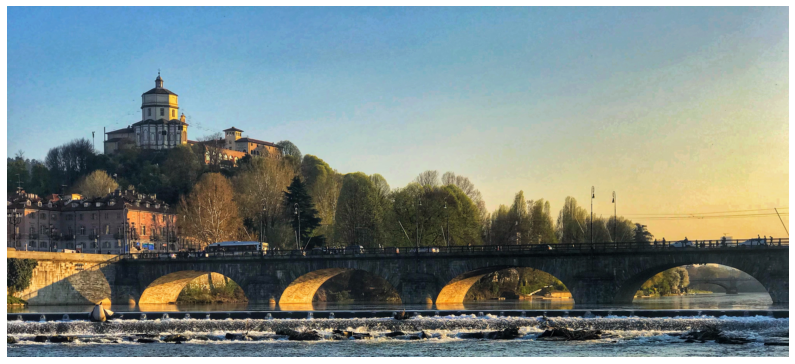

A view of Monte dei Cappuccini.


In [48]:
img4 = np.array(Image.open('Po.jpeg'))
fig = plt.figure()
plt.imshow(img4, interpolation='bilinear')
fig.set_figwidth(14)
fig.set_figheight(10)
plt.axis('off')
plt.show()

print('A view of Monte dei Cappuccini.')